# Loading Data from CSV file

* The Pandas library in Python provides excellent, built-in support for time series data.
* Pandas represents time series datasets as a **Series**. 
* A Series is a one-dimensional array with a time label for each row.
* A Dataframe is a collection of series

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Download csv file from resources and put it in working directory
dataframe = pd.read_csv('daily-total-female-births-CA.csv', header=0)

#### First five records

In [6]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


#### Data Type

In [7]:
dataframe['date'].dtype

dtype('O')

### Loading data with parse_dates

In [8]:
df2 = pd.read_csv('daily-total-female-births-CA.csv', header=0 , parse_dates=[0])

#### First five records

In [9]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


#### Data Type

In [10]:
df2['date'].dtype

dtype('<M8[ns]')

#### Note
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv(.........,parse_dates=[0], date_parser=dateparse)

https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

### Loading Data as a series

In [11]:
series = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

#### First 5 records

In [12]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

# Exploring Time Series Data

#### Size

In [13]:
series.shape

(365,)

In [14]:
df2.shape

(365, 2)

### Querying by time

In [15]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [16]:
df2[(df2['date'] > '1959-01-01') & (df2['date'] <= '1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


### Descriptive Statistics

In [17]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [18]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


# Feature Engineering

* Date time features
* Lag features
* Window features
* Expanding feature


### Date time features

In [19]:
df2.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [20]:
features = df2.copy()

In [21]:
features['year'] = df2['date'].dt.year

In [22]:
features['month'] = df2['date'].dt.month

In [23]:
features['day'] = df2['date'].dt.day

In [24]:
features.head(5)

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/series.html#datetimelike-properties

### Lag features

To create lag1 feature

In [25]:
features['lag2'] =  df2['births'].shift(2)

In [26]:
features['lag2'] =  df2['births'].shift(365)

In [27]:
features.head(7)

,date,births,year,month,day,lag2
0,1959-01-01,35,1959,1,1,NaN
1,1959-01-02,32,1959,1,2,NaN
2,1959-01-03,30,1959,1,3,NaN
3,1959-01-04,31,1959,1,4,NaN
4,1959-01-05,44,1959,1,5,NaN
5,1959-01-06,29,1959,1,6,NaN
6,1959-01-07,45,1959,1,7,NaN


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.shift.html#pandas.Series.shift

### Window features

In [28]:
features['Roll_mean'] = df2['births'].rolling(window = 2).mean()

In [29]:
features.head(5)

,date,births,year,month,day,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,NaN,33.5
2,1959-01-03,30,1959,1,3,NaN,31.0
3,1959-01-04,31,1959,1,4,NaN,30.5
4,1959-01-05,44,1959,1,5,NaN,37.5


In [30]:
features['Roll_max'] = df2['births'].rolling(window = 3).max()

In [31]:
features.head(5)

,date,births,year,month,day,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,NaN,37.5,44.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.rolling.html#pandas.Series.rolling

### Expanding features

In [32]:
features['Expand_max'] = df2['births'].expanding().max()

In [33]:
features.head(10)

,date,births,year,month,day,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,NaN,37.5,44.0,44.0
5,1959-01-06,29,1959,1,6,NaN,36.5,44.0,44.0
6,1959-01-07,45,1959,1,7,NaN,37.0,45.0,45.0
7,1959-01-08,43,1959,1,8,NaN,44.0,45.0,45.0
8,1959-01-09,38,1959,1,9,NaN,40.5,45.0,45.0
9,1959-01-10,27,1959,1,10,NaN,32.5,43.0,45.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.expanding.html#pandas.Series.expanding

# Time Series - Data Visualization

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

In [35]:
Dataviz_df = df2.copy()

In [36]:
Dataviz_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


<AxesSubplot:>

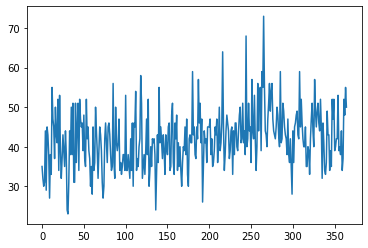

In [37]:
Dataviz_df['births'].plot()

In [38]:
Dataviz_df.index = Dataviz_df['date'] 

<AxesSubplot:xlabel='date'>

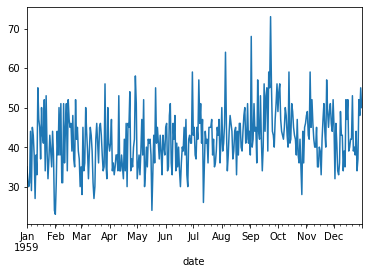

In [39]:
Dataviz_df['births'].plot()

### Zooming In

In [40]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['date'] > '1959-01-01') & (Dataviz_df['date'] <= '1959-01-10')].copy()

In [41]:
Dataviz_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


<AxesSubplot:xlabel='date'>

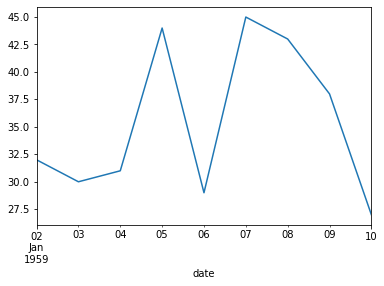

In [42]:
Dataviz_df2['births'].plot()

### Trendline

In [43]:
import seaborn as sns

<AxesSubplot:ylabel='births'>

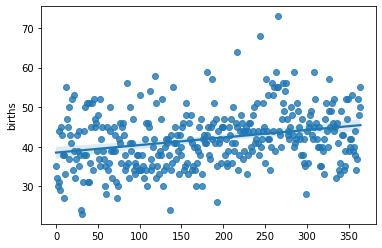

In [44]:
sns.regplot(x= df2.index.values, y=df2['births'])

<AxesSubplot:ylabel='births'>

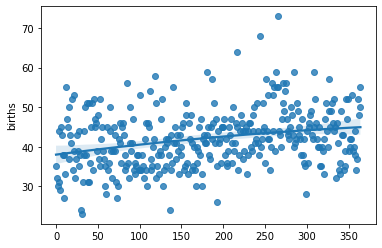

In [45]:
sns.regplot(x= df2.index.values, y=df2['births'], order =2)

In [46]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [47]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<AxesSubplot:>

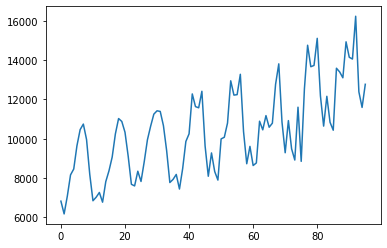

In [48]:
miles_df['MilesMM'].plot()

<AxesSubplot:ylabel='MilesMM'>

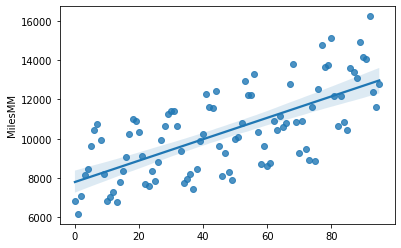

In [49]:
sns.regplot(x= miles_df.index.values, y=miles_df['MilesMM'])

### Removing Seasonality

In [50]:
miles_df['year'] = miles_df['Month'].dt.year

In [51]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [52]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='year'>

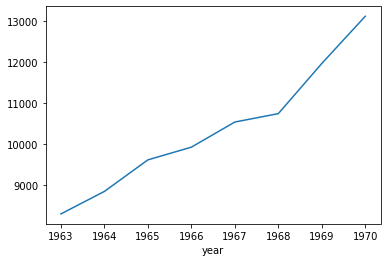

In [53]:
miles_df.groupby('year')['MilesMM'].mean().plot()

### Creating Lag plots

In [54]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [55]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

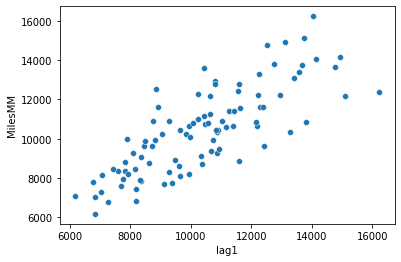

In [56]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])

In [57]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

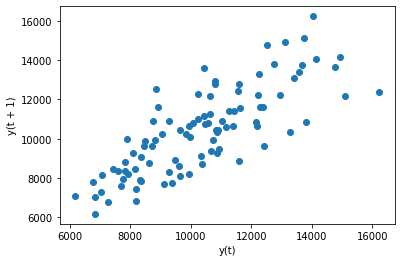

In [58]:
lag_plot(miles_df['MilesMM'])

### Autocorrelation Plots

In [59]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

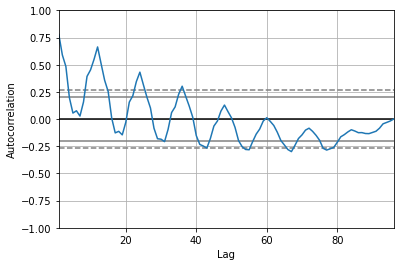

In [60]:
autocorrelation_plot(miles_df['MilesMM'])

## Downsampling and Upsampling

In [61]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [62]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


### Downsampling

In [63]:
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()

In [64]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [65]:
yearly_total_miles_df = miles_df.resample('A', on='Month').sum()

In [66]:
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


| Alias  | Description           |
|--------|-----------------------|
| B      | Business day          |
| D      | Calendar day          |
| W      | Weekly                |
| M      | Month end             |
| Q      | Quarter end           |
| A      | Year end              |
| BA     | Business year end     |
| AS     | Year start            |
| H      | Hourly frequency      |
| T, min | Minutely frequency    |
| S      | Secondly frequency    |
| L, ms  | Millisecond frequency |
| U, us  | Microsecond frequency |
| N, ns  | Nanosecond frequency  |

### Upsampling

In [67]:
upsampled_miles_df = miles_df.resample('D', on='Month').mean()

In [68]:
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [69]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear')

In [70]:
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


<AxesSubplot:xlabel='Month'>

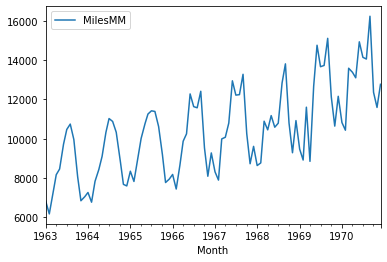

In [71]:
interpolated_miles_df.plot()

In [72]:
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method='spline', order=2)

In [73]:
poly_interpolated_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6775.328886
1963-01-03,6725.739829
1963-01-04,6678.197709
1963-01-05,6632.702526
1963-01-06,6589.254280
1963-01-07,6547.852971
1963-01-08,6508.498600
1963-01-09,6471.191166


<AxesSubplot:xlabel='Month'>

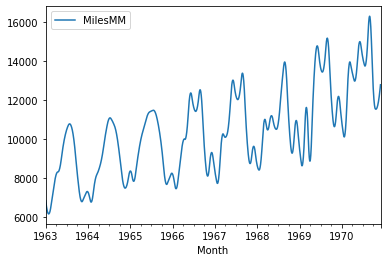

In [74]:
poly_interpolated_miles_df.plot()

| Method  | Description                                               |
|---------|-----------------------------------------------------------|
| bfill   | Backward fill                                             |
| count   | Count of values                                           |
| ffill   | Forward fill                                              |
| first   | First valid data value                                    |
| last    | Last valid data value                                     |
| max     | Maximum data value                                        |
| mean    | Mean of values in time range                              |
| median  | Median of values in time range                            |
| min     | Minimum data value                                        |
| nunique | Number of unique values                                   |
| ohlc    | Opening value, highest value, lowest value, closing value |
| pad     | Same as forward fill                                      |
| std     | Standard deviation of values                              |
| sum     | Sum of values                                             |
| var     | Variance of values                                        |

## Decomposing Time Series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [76]:
miles_decomp_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [77]:
miles_decomp_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [78]:
miles_decomp_df.index = miles_decomp_df['Month'] 

In [79]:
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')

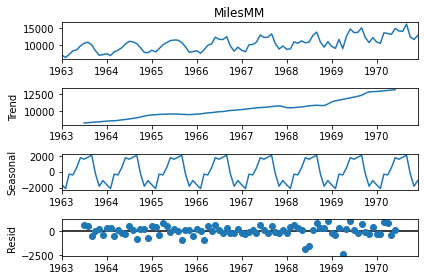

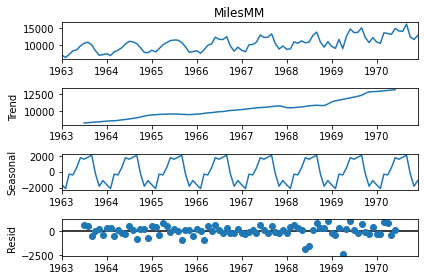

In [80]:
result.plot()

In [81]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

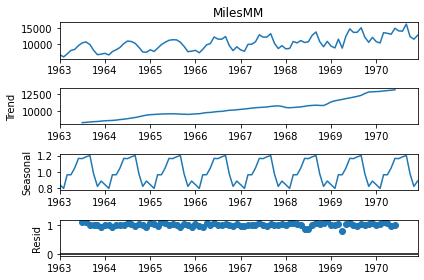

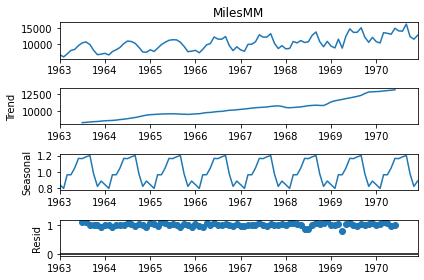

In [82]:
result2.plot()

### Differencing

In [83]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [84]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [85]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [86]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [87]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


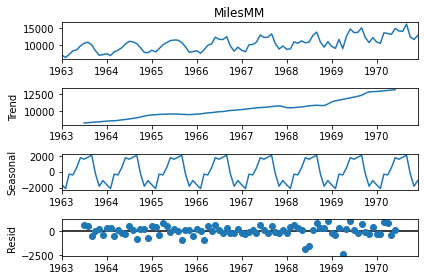

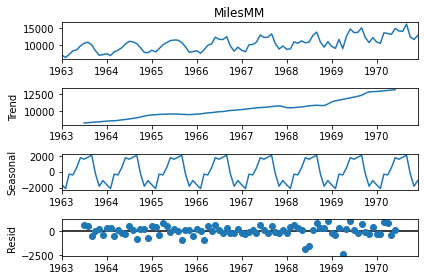

In [88]:
miles_df.index = miles_df['Month'] 
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot()

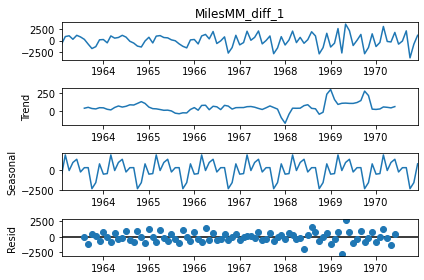

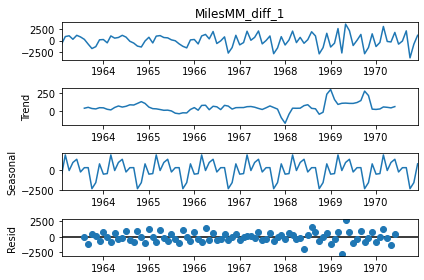

In [89]:
miles_df.index = miles_df['Month'] 
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot()

<AxesSubplot:xlabel='Month'>

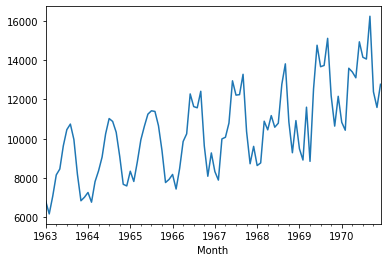

In [90]:
miles_df['MilesMM'].plot()

<AxesSubplot:xlabel='Month'>

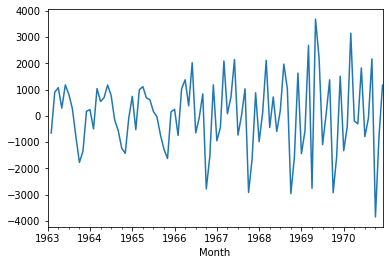

In [91]:
miles_df['MilesMM_diff_1'].plot() 

In [92]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

<AxesSubplot:xlabel='Month'>

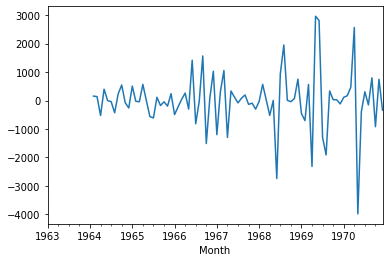

In [93]:
miles_df['MilesMM_diff_12'].plot() 

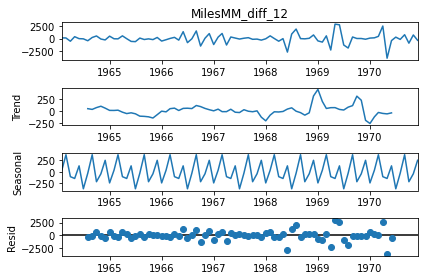

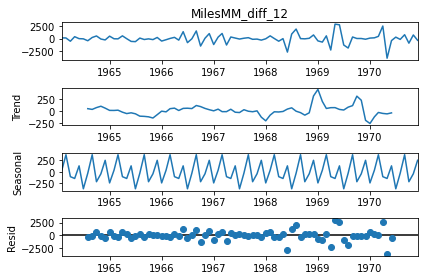

In [94]:
result_c = seasonal_decompose(miles_df.iloc[13:,4], model='additive')
result_c.plot()

In [95]:
miles_df.head(50)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


## Test-Train Split

In [96]:
temp_df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [97]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [98]:
temp_df.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [99]:
temp_df.shape

(3650, 2)

In [100]:
temp_df.shape[0]

3650

In [101]:
train_size = int(temp_df.shape[0]*0.8)
train_size

2920

In [102]:
train =  temp_df[0:train_size]

In [103]:
test =  temp_df[train_size:]

In [104]:
train.shape

(2920, 2)

In [105]:
test.shape

(730, 2)

### Walk Forward Validation

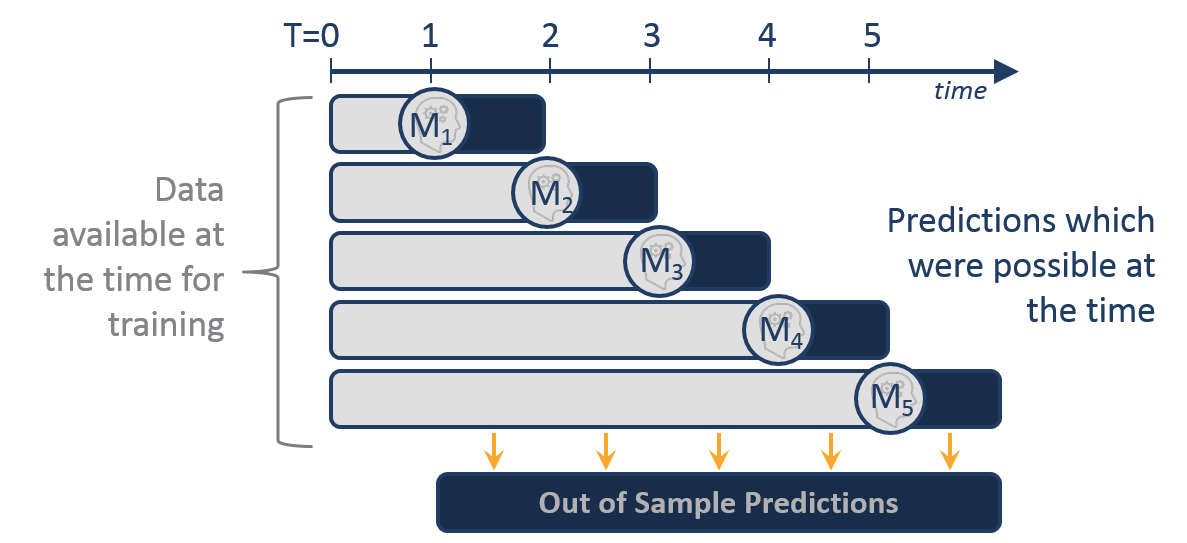

### Persistence Model

In [106]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [107]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [108]:
df['t'] =  df['Temp'].shift(1)

In [109]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [110]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [111]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [112]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

#### # walk-forward validation

In [113]:
predictions = test_X.copy()

In [114]:
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [115]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

In [116]:
from matplotlib import pyplot

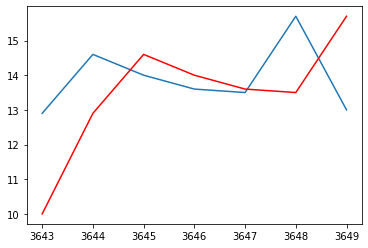

In [117]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Autoregression Model

In [118]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [119]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [136]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [121]:
from statsmodels.tsa.ar_model import AutoReg

In [122]:
model = AutoReg(train,29)
model_fit = model.fit()

#### No. of lag Variables

#### Coef of lag variables

In [124]:
model_fit.params

const       0.557544
Temp.L1     0.588595
Temp.L2    -0.090826
Temp.L3     0.048262
Temp.L4     0.040065
Temp.L5     0.039302
Temp.L6     0.025946
Temp.L7     0.044668
Temp.L8     0.012768
Temp.L9     0.037436
Temp.L10   -0.000812
Temp.L11    0.004791
Temp.L12    0.018473
Temp.L13    0.026891
Temp.L14    0.000576
Temp.L15    0.024810
Temp.L16    0.007403
Temp.L17    0.009916
Temp.L18    0.034160
Temp.L19   -0.009120
Temp.L20    0.024213
Temp.L21    0.018787
Temp.L22    0.012184
Temp.L23   -0.018553
Temp.L24   -0.001772
Temp.L25    0.016732
Temp.L26    0.019762
Temp.L27    0.009832
Temp.L28    0.006227
Temp.L29   -0.001377
dtype: float64

In [131]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [132]:
predictions

3643    13.053794
3644    13.532591
3645    13.243126
3646    13.091438
3647    13.146989
3648    13.176153
3649    13.376567
3650          NaN
dtype: float64

In [127]:
predictions.iloc[0]

13.053794217229852

In [128]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

ValueError: Input contains NaN.

In [ ]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Walk Forward

In [137]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [138]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [139]:
data = train
predict =[]
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
    

NameError: name 'AR' is not defined

In [ ]:
predict

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

In [ ]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

### Moving Average Model

In [140]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [141]:
df['t'] =  df['Temp'].shift(1)

In [142]:
df['Resid'] = df['Temp'] - df['t']

In [143]:
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [144]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [145]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [146]:
from statsmodels.tsa.ar_model import AR

In [147]:
model = AR(train)
model_fit = model.fit()

NotImplementedError: AR has been removed from statsmodels and replaced with statsmodels.tsa.ar_model.AutoReg.

In [ ]:
model_fit.k_ar

In [ ]:
model_fit.params

In [ ]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [ ]:
pred_resid

In [ ]:
df.t[df.shape[0]-7:]

In [ ]:
predictions = df.t[df.shape[0]-7:] + pred_resid

In [ ]:
predictions

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

In [ ]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

## ARIMA Model

In [148]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

In [149]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


<AxesSubplot:>

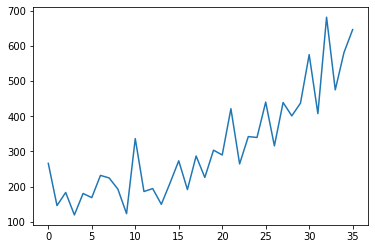

In [150]:
df['Sales'].plot()

Trend is Polynomial.  
D =2

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

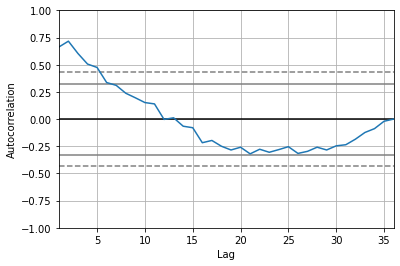

In [151]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

 q = 5 

### Partial Autocorrelation Graph

In [152]:
from statsmodels.graphics.tsaplots import plot_pacf

c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


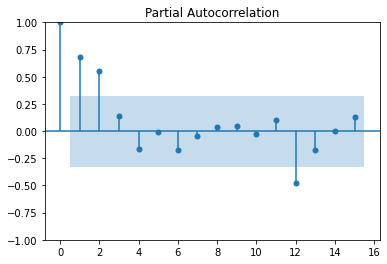

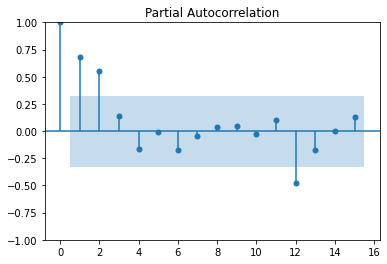

In [153]:
plot_pacf(df['Sales'], lags=15)

p = 2

In [156]:
from statsmodels.tsa.arima.model import ARIMA

In [157]:
model = ARIMA(df['Sales'], order=(5,2,2))

In [158]:
model_fit = model.fit()

c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [159]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -191.901
Date:                Sat, 02 Sep 2023   AIC                            399.801
Time:                        14:17:21   BIC                            412.012
Sample:                             0   HQIC                           403.966
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2741      3.066     -0.416      0.678      -7.283       4.735
ar.L2         -0.9934      3.912     -0.254      0.800      -8.661       6.674
ar.L3         -0.8128      2.923     -0.278      0.781      -6.542       4.917
ar.L4         -0.5075      2.312     -0.220      0.826      -5.038       4.023
ar.L5         -0.0803      1.328     -0.060      0.952      -2.684       2.523
ma.L1         -0.8519      3.156     -0.270      0.787      -7.037       5.333
ma.L2          0.0832      2.548      0.033      0.974      -4.910       5.077
sigma2      3996.2457   1308.562      3.054      0.002    1431.511    6560.980
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.72   Prob(JB):                         0.81
Heteroskedasticity (H):               0.94   Skew:                            -0.00
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [160]:
residuals = model_fit.resid

<AxesSubplot:>

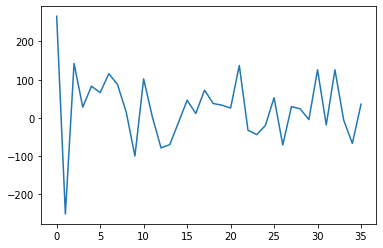

In [161]:
residuals.plot()

In [162]:
residuals.describe()

count     36.000000
mean      24.806050
std       88.931498
min     -251.238808
25%      -18.718283
50%       26.920282
75%       75.248616
max      266.000000
dtype: float64

### Variations
* **ARIMA** - <br />
    model = ARIMA(df['Sales'], order=(q,d,p)) <br />
* **Autoregression** - <br />
    model = ARIMA(df['Sales'], order=(p,d,0)) <br />
* **Moving Avaerage Model** - <br />
    model = ARIMA(df['Sales'], order=(0,d,q)) <br />

In [163]:
output = model_fit.forecast()

In [164]:
output

36    608.240304
dtype: float64

In [166]:
model_fit.forecast(5)

36    608.240304
37    700.069306
38    641.957563
39    725.401591
40    727.544084
Name: predicted_mean, dtype: float64

### Walk Forward ARIMA

In [167]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

In [168]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


def parser(x):
return datetime.strptime('190'+x, '%Y-%m')

In [169]:
train_size = int(df.shape[0]*0.7)

In [170]:
train, test = df.Sales[0:train_size], df.Sales[train_size:]

In [171]:
test.shape

(11,)

In [172]:
data = train
predict =[]
for t in test:
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)

KeyError: 0

In [ ]:
predict

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

## SARIMA or Seasonal ARIMA 

	
SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

In [173]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [174]:
df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [175]:
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [176]:
df.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [177]:
df.index = df['Month'] 

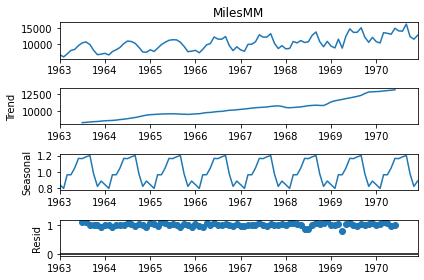

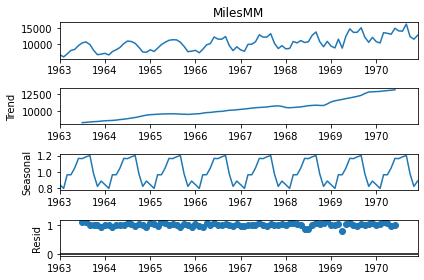

In [178]:
result_a = seasonal_decompose(df['MilesMM'], model='multiplicative')
result_a.plot()

In [179]:
model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [180]:
model_fit = model.fit()

c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\hp\pycharmprojects\pythonproject\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [181]:
residuals = model_fit.resid

<AxesSubplot:xlabel='Month'>

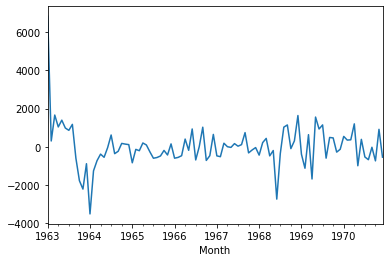

In [182]:
residuals.plot()

In [183]:
output = model_fit.forecast()

In [ ]:
output

In [ ]:
model_fit.forecast(12)

In [ ]:
yhat = model_fit.predict()

In [ ]:
yhat.head()

In [ ]:
pyplot.plot(df['MilesMM'])
pyplot.plot(yhat, color='red')